Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as normal

# import seaborn as sn #optional, uncomment if you have the seaborn package
# sn.set_style("whitegrid")

# Markov Chain Example

We have a worker that can be either employed or unemployed. If she is employed, she loses her job with probability $\delta$ in every period, and if she is unemployed, she finds a job with probability $\alpha$ every period.

Call $X_t$ an indicator variable that equals 1 if the worker is employed at time $t$. Then $X_t$ can be represented by a Markov chain with transition matrix

$$T = \begin{bmatrix} 1-\delta, \delta \\ \alpha, 1-\alpha \end{bmatrix}$$

Let's give it some numbers:

In [8]:
delta = 0.03
alpha = 0.20

T = np.array([[1-delta, delta],
              [alpha, 1-alpha]])

We showed in class that we can solve for a *state vector* $\mathbf{s}$ such that

$$ \mathbf{s}T = \mathbf{s} $$

where we call $\mathbf{s}$ the stationary distribution. The vector $\mathbf{s}$ codifies the probabilities that one $X_t$ is 1 and 0 before we observe it (so $t$ is in the future). As such, $\mathbf{s}$ needs to sum to 1 and be as long as the number of posible values (or states) $X_t$ cn take - in our case, either 0 or 1, so a vector of length 2.

We can solve the system of equations to find

$$ \mathbf{s} = \left[ \frac{\alpha}{\alpha+\delta},\frac{\delta}{\alpha+\delta} \right] $$

so in our case,

In [9]:
e_star = alpha/(alpha+delta)
print(r's=',np.array([e_star,1-e_star]).round(4))

s= [0.8696 0.1304]


We can also find this using the eigenvalues and eigenvectors decomposition - but please note we need to transpose the transition matrix, as this works when

$$ T'\mathbf{s}' = \mathbf{s}' $$

as I wrote in the slides. So

In [30]:
evals, evecs = np.linalg.eig(T.T)
evals

array([1.  , 0.77])

In [43]:
np.dot(T,T)

array([[0.9469, 0.0531],
       [0.354 , 0.646 ]])

Find the first column of the eigenvectors (as is the one associated with the 1 eigenvalue) and re-sacle it:

In [31]:
evecs[:,0]/np.sum(evecs[:,0])

array([0.86956522, 0.13043478])

The same!

Let's use the fact that the chain is aperiodic and irreducible to raise $T$ to a high power (the python way)

In [45]:
np.linalg.matrix_power(T,40)

array([[0.86956898, 0.13043102],
       [0.86954016, 0.13045984]])

Magic.

Let's see if the first number equates the percentage of time the worker will spend on employment after a life (in the working population) of $N$ periods:

In [9]:
def simulate_e_path(N,T,X_0=0):
    """
    Simulates the path of a worker, for a given transition matrix T, 
    where the entries are the probabilities that the path of [X_t,X_t+1] are [11, 10],[01, 00].
    N: integer, number of periods for the simulation
    T: 2x2 transition Matrix
    X_0 (optional argument): where do we start the chain. Default ouption: 0 (unemployment)

    Returns:
    path: a vector of length N with the simualted path of the worker.
    """
    # Create space - create the path vector (make sure it is an integer vector, which is the second argument of np.zeros)
    path = np.zeros(N,dtype=int)
    # Set the first value of the vector
    path[0] = X_0
    # For every time period from 1 to N
    for t in range(1,N):
        # Find the conditional distribution by looking up the right value of the matrix
        # (so if path[t-1] is 1, we pick row 0. Python starts counting from 0, deal with it.)
        conditional_dist = T[1-path[t-1],:]
        # Draw from a standard uniform. If the value is smaller than the first number of the conditional distribution,
        # then the worker's next state will equal 1. Check this makes intuititve sense!
        path[t] = int(np.random.random()<conditional_dist[0])
    # When we are done, return the path
    return path

Let's simulate one path:

In [14]:
N = 10
path_i = simulate_e_path(N,T)
path_i

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

Calculate what share of time the worker spent in employment by taking an average:

In [15]:
np.sum(path_i)/N

0.8

Not quite the theoretical value. Let's increase $N$...

In [16]:
N = 10000
path_i = simulate_e_path(N,T)
path_i

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
np.sum(path_i)/N

0.8682

Compare to the first element of $\mathbf{s}$

In [18]:
e_star

0.8695652173913043

Very close!

## Bonus: Central limit theorem

Let's do a bunch (30) of small (10 period) paths and calcualte their means:

In [40]:
M = 30
N = 10

X_bar_M = np.zeros(M)

for i in range(M):
    X_bar_M[i] = np.average(simulate_e_path(N,T))

X_bar_M

array([0.4, 0.1, 0.7, 0. , 0.5, 0.8, 0.7, 0.8, 0.7, 0.9, 0. , 0.2, 0.2,
       0.6, 0.9, 0.4, 0.7, 0.9, 0.9, 0.8, 0.5, 0.9, 0.6, 0.4, 0.6, 0.8,
       0.6, 0.6, 0.5, 0.3])

Let's plot a histogram (and mark the theoretical value of the mean)

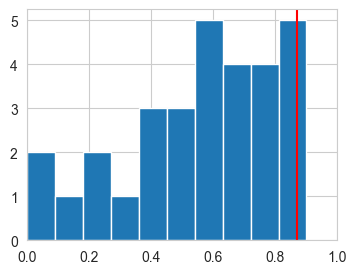

In [41]:
plt.figure(figsize=(4,3))
plt.hist(X_bar_M,bins=10)
plt.xlim(0,1)
plt.axvline(e_star,c='r')
plt.show()

Well that's all over the place! Let's increase $N=100$

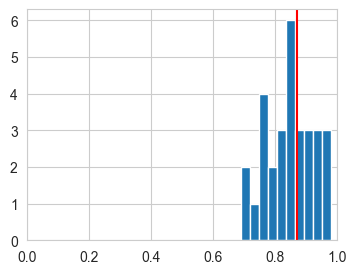

In [42]:
M = 30
N = 100

X_bar_M = np.zeros(M)

for i in range(M):
    X_bar_M[i] = np.average(simulate_e_path(N,T))

plt.figure(figsize=(4,3))
plt.hist(X_bar_M,bins=10)
plt.axvline(e_star,c='r')
plt.xlim(0,1)
plt.show()

Already much closer to the actual mean! Let's keep going...

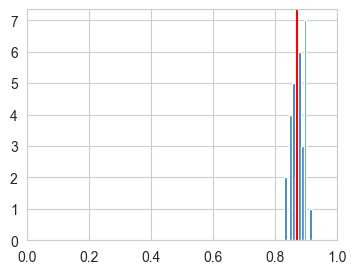

In [43]:
M = 30
N = 1000

X_bar_M = np.zeros(M)

for i in range(M):
    X_bar_M[i] = np.average(simulate_e_path(N,T))

plt.figure(figsize=(4,3))
plt.hist(X_bar_M,bins=10)
plt.xlim(0,1)
plt.axvline(e_star,c='r')
plt.show()

And how about a very very large number? (so we get some weak LLN convergence)?

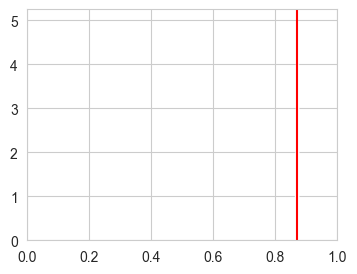

In [47]:
M = 30
N = 100000

X_bar_M = np.zeros(M)

for i in range(M):
    X_bar_M[i] = np.average(simulate_e_path(N,T))

plt.figure(figsize=(4,3))
plt.hist(X_bar_M,bins=10)
plt.xlim(0,1)
plt.axvline(e_star,c='r')
plt.show()

It's had to see, so let's focus on a point between 0.8 and 1:

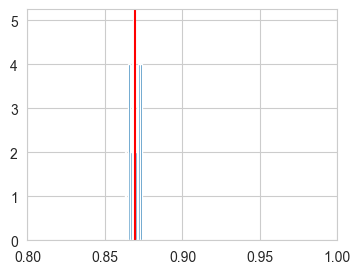

In [49]:
plt.figure(figsize=(4,3))
plt.hist(X_bar_M)
plt.xlim(0.8,1)
plt.axvline(e_star,c='r')
plt.show()

The means are within an epsilon of the true mean. That's the weak LLN.

Back to the example of small $N$, let's generate many small paths and plot them:

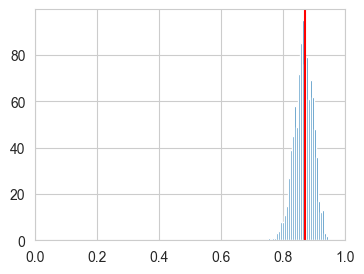

In [104]:
M = 1000
N = 1000

X_bar_M = np.zeros(M)

for i in range(M):
    X_bar_M[i] = np.average(simulate_e_path(N,T))

plt.figure(figsize=(4,3))
plt.hist(X_bar_M,bins=30)
plt.xlim(0,1)
plt.axvline(e_star,c='r')
plt.show()

This case is a bit tricky because we have a *truncated* Normal distribution, so the variance is not going to be quite the same. 